In [2]:
#imports 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#machine learning imports 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#read data 
boston_housing = pd.read_csv("dataset.csv")
boston_housing.head()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS
0,12.216023,2,3,2005,1600.0,22000.000000,6
1,12.860999,4,4,2009,3500.0,4000.000000,9
2,11.884489,2,3,2006,1364.0,7500.000000,6
3,11.775290,1,1,1985,650.0,43925.933653,4
4,12.206073,2,5,1975,3000.0,22000.000000,9


In [4]:
#explore dataset 

#datatypes 
boston_housing.dtypes

LOGVALUE    float64
BATHS         int64
BEDRMS        int64
BUILT         int64
UNITSF      float64
LOT         float64
ROOMS         int64
dtype: object

In [5]:
#checking missing values 
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOGVALUE  9999 non-null   float64
 1   BATHS     9999 non-null   int64  
 2   BEDRMS    9999 non-null   int64  
 3   BUILT     9999 non-null   int64  
 4   UNITSF    9999 non-null   float64
 5   LOT       9999 non-null   float64
 6   ROOMS     9999 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 546.9 KB


In [6]:
#some summary statistics 
boston_housing.describe()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,12.057046,1.917092,3.218022,1970.586559,2339.489442,44484.951915,6.577358
std,1.077231,0.789653,0.878536,25.617083,1952.129542,116465.240508,1.690078
min,0.000000,0.000000,0.000000,1919.000000,99.000000,200.000000,1.000000
25%,11.512925,1.000000,3.000000,1950.000000,1400.000000,5840.000000,5.000000
50%,12.100712,2.000000,3.000000,1975.000000,2000.000000,11000.000000,6.000000
75%,12.611538,2.000000,4.000000,1990.000000,2500.000000,43925.933653,8.000000
max,15.476535,9.000000,8.000000,2011.000000,20159.000000,933185.000000,15.000000


In [7]:
#task1: 
#predict median house value based on: avg num rooms per house ---> logValue, check if it's "normal"
#using linear and polynomial models of varying flexibility 
#validation set approach – compare linear and polynomial models 


(array([1.100e+01, 1.000e+00, 4.000e+00, 2.200e+01, 2.600e+01, 1.000e+02,
        5.460e+02, 5.668e+03, 3.419e+03, 2.020e+02]),
 array([ 0.        ,  1.54765345,  3.09530691,  4.64296036,  6.19061381,
         7.73826727,  9.28592072, 10.83357417, 12.38122763, 13.92888108,
        15.47653453]),
 <BarContainer object of 10 artists>)

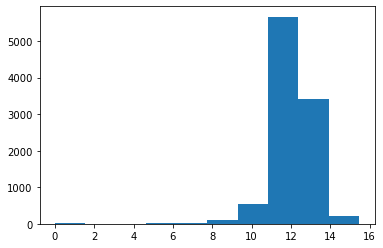

In [8]:
#convert series (first column of dataset) into numpy array for visualization purposes
house_value_np = np.array(boston_housing['LOGVALUE'])

plt.hist(house_value_np) #looks very skewed 

(array([8.953e+03, 8.150e+02, 1.390e+02, 5.500e+01, 1.900e+01, 7.000e+00,
        1.000e+00, 6.000e+00, 2.000e+00, 2.000e+00]),
 array([1.0000000e+00, 5.2647080e+05, 1.0529406e+06, 1.5794104e+06,
        2.1058802e+06, 2.6323500e+06, 3.1588198e+06, 3.6852896e+06,
        4.2117594e+06, 4.7382292e+06, 5.2646990e+06]),
 <BarContainer object of 10 artists>)

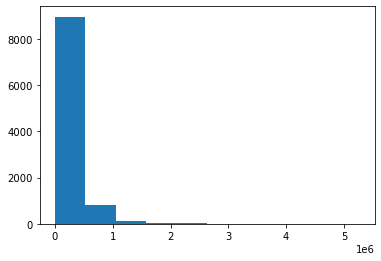

In [9]:
#let's transform it 
e_value = np.exp(house_value_np)
plt.hist(e_value) #also skewed so no use ... 

In [10]:
#no changes to log values 


In [11]:
#validation set - break data into 2 parts 

#first x and y have to be defined: 
# y = median house value 
# x = average number of rooms per house 
y = boston_housing['LOGVALUE']
x = boston_housing['BEDRMS']

#check shapes to make sure you're fine 
print(y.shape)
print(x.shape)

#validation set 
x_train, x_val, y_train, y_val = train_test_split(x,y , test_size= 0.5, random_state = 0)

x_train_np = np.array(x_train)
y_train_np = np.array(y_train)
x_val_np = np.array(x_val)
y_val_np = np.array(y_val)

x_train_np = x_train_np.reshape(-1,1)
print(x_train_np.shape)

y_train_np = y_train_np.reshape(-1,1)
print(y_train_np.shape)

x_val_np = x_val_np.reshape(-1,1)
y_val_np = y_val_np.reshape(-1,1)

(9999,)
(9999,)
(4999, 1)
(4999, 1)


Text(0, 0.5, 'Housing Prices (LOG)')

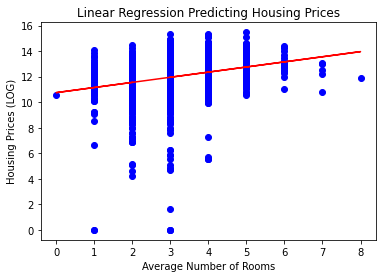

In [12]:
#predict median house value based on: avg num rooms per house
#linear model 

#since this is not clear from dataset, I'm assuming that LOGVALUE is the medianvalue 
lin_reg = LinearRegression()
model_fit = lin_reg.fit(x_train_np, y_train_np)
y_predicted = lin_reg.predict(x_val_np)

plt.scatter(x_val_np, y_val_np, color='blue')
plt.plot(x_val_np, y_predicted, color='red')
plt.title("Linear Regression Predicting Housing Prices")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Housing Prices (LOG)")

In [13]:
#measurements of the model 
#mean squared error 
mse_linM = mean_squared_error(y_val_np, y_predicted)
#r^2
r2_linM = r2_score(y_val_np, y_predicted) 

print("MSE for Linear Model is: ", mse_linM)
print("R-squared for Linear Model is: ", r2_linM)


MSE for Linear Model is:  1.067327325078158
R-squared for Linear Model is:  0.08708637167222977


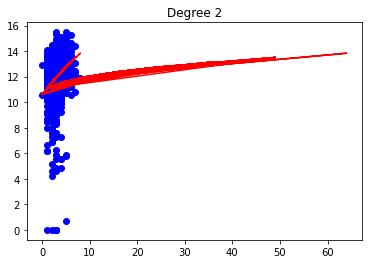

In [14]:
X = boston_housing['BEDRMS']
Y = boston_housing['LOGVALUE']

X = np.array(X)
Y = np.array(Y)

X_train = X[:round(len(X)/2)]
X_val = X[round((len(X))/2):]
Y_train = Y[:round((len(Y))/2)]
Y_val = Y[round((len(Y))/2):]


#polynomials 
p2 = PolynomialFeatures(degree = 2, include_bias = False)
reg = LinearRegression()

x_p2 = p2.fit_transform(X_train.reshape(-1,1))
reg.fit(x_p2, Y_train)
y_p2_pred = reg.predict(p2.fit_transform(X_val.reshape(-1,1)))

plt.scatter(X_val, Y_val, color='blue')
plt.plot(p2.fit_transform(X_val.reshape(-1,1)),y_p2_pred, color='red')
plt.title("Degree 2")
plt.show()


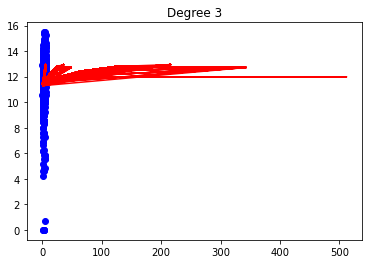

In [15]:
#polynomials 
p3 = PolynomialFeatures(degree = 3, include_bias = False)
reg = LinearRegression()

x_p3 = p3.fit_transform(X_train.reshape(-1,1))
reg.fit(x_p3, Y_train)
y_p3_pred = reg.predict(p3.fit_transform(X_val.reshape(-1,1)))

plt.scatter(X_val, Y_val, color='blue')
plt.plot(p3.fit_transform(X_val.reshape(-1,1)),y_p3_pred, color='red')
plt.title("Degree 3")
plt.show()


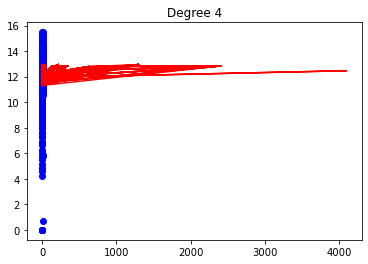

In [16]:
#polynomials 
p4 = PolynomialFeatures(degree = 4, include_bias = False)
reg = LinearRegression()

x_p4 = p4.fit_transform(X_train.reshape(-1,1))
reg.fit(x_p4, Y_train)
y_p4_pred = reg.predict(p4.fit_transform(X_val.reshape(-1,1)))

plt.scatter(X_val, Y_val, color='blue')
plt.plot(p4.fit_transform(X_val.reshape(-1,1)),y_p4_pred, color='red')
plt.title("Degree 4")
plt.show()


In [17]:
#measurements
#mean squared error 
mse_p2 = mean_squared_error(Y_val, y_p2_pred)
mse_p3 = mean_squared_error(Y_val, y_p3_pred)
mse_p4 = mean_squared_error(Y_val, y_p4_pred)
#r^2
r2_p2 = r2_score(Y_val, y_p2_pred)
r2_p3 = r2_score(Y_val, y_p3_pred)
r2_p4 = r2_score(Y_val, y_p4_pred)

print("MSE for Degree 2: ", mse_p2)
print("MSE for Degree 3: ", mse_p3)
print("MSE for Degree 4: ", mse_p3)
print("------------------------------------------------")
print("R-squared for D2: ", r2_p2)
print("R-squared for D3: ", r2_p3)
print("R-squared for D4: ", r2_p4)

MSE for Degree 2:  1.0721446031090762
MSE for Degree 3:  1.0679342920530135
MSE for Degree 4:  1.0679342920530135
------------------------------------------------
R-squared for D2:  0.08435257393573525
R-squared for D3:  0.08794832069436687
R-squared for D4:  0.08793355506766432


According to the Results obtained here, It seems that the MSE values for Polynomial Degree 3, 4 and Linear Model are similar. (1.067) 

R-squared values for Polynomial Degree 3, 4 and Linear model are a;sp similar. (0.087) 

So, no real comparison could be made here. Based on how the original data looks, perhaps the best model could be logarithmic. Validation set method is highly variable and not reliable. This exact same exercise will be done using other methods such as Kfold Cross Validation and LOOCV. 

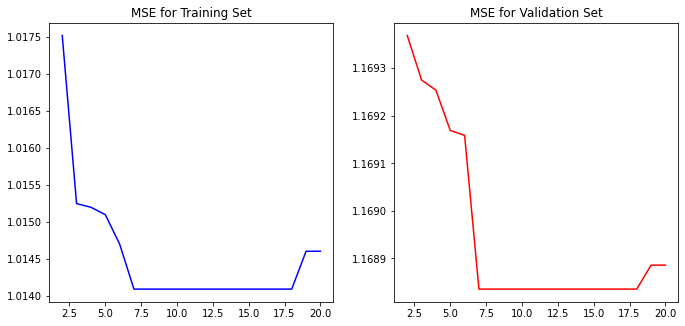

In [18]:
# 1B 

import numpy as np
import matplotlib.pyplot as plt 

mse_values_training = np.zeros(19)
mse_values_validation = np.zeros(19)
flex = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


X = boston_housing['BEDRMS']
Y = boston_housing['LOGVALUE']

X = np.array(X)
Y = np.array(Y)

X_train = X[:round(len(X)/2)]
X_val = X[round((len(X))/2):]
Y_train = Y[:round((len(Y))/2)]
Y_val = Y[round((len(Y))/2)-1:]




def calculate_mse(deg, dsetx, dsety):
    """You should provide degree of polynomial, x data and y data. Here, I will pass 
    training set (x and y) and validation set at different calls of the function. """
    p = PolynomialFeatures(degree = deg, include_bias = False)
    reg = LinearRegression()
    x = p.fit_transform(dsetx.reshape(-1,1))
    reg.fit(x, dsety)
    y_pred = reg.predict(x)
    return mean_squared_error(dsety, y_pred)
    

for i in range(2,21):
    #will try 20 different degrees 
    mse_values_training[i-2] = calculate_mse(i, X_train, Y_train)
    mse_values_validation[i-2] = calculate_mse(i, X_train, Y_val)


fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=3)
ax[0].plot(flex, mse_values_training, color='blue')
ax[0].title.set_text('MSE for Training Set')
ax[1].plot(flex, mse_values_validation, color='red')
ax[1].title.set_text('MSE for Validation Set')
plt.show();

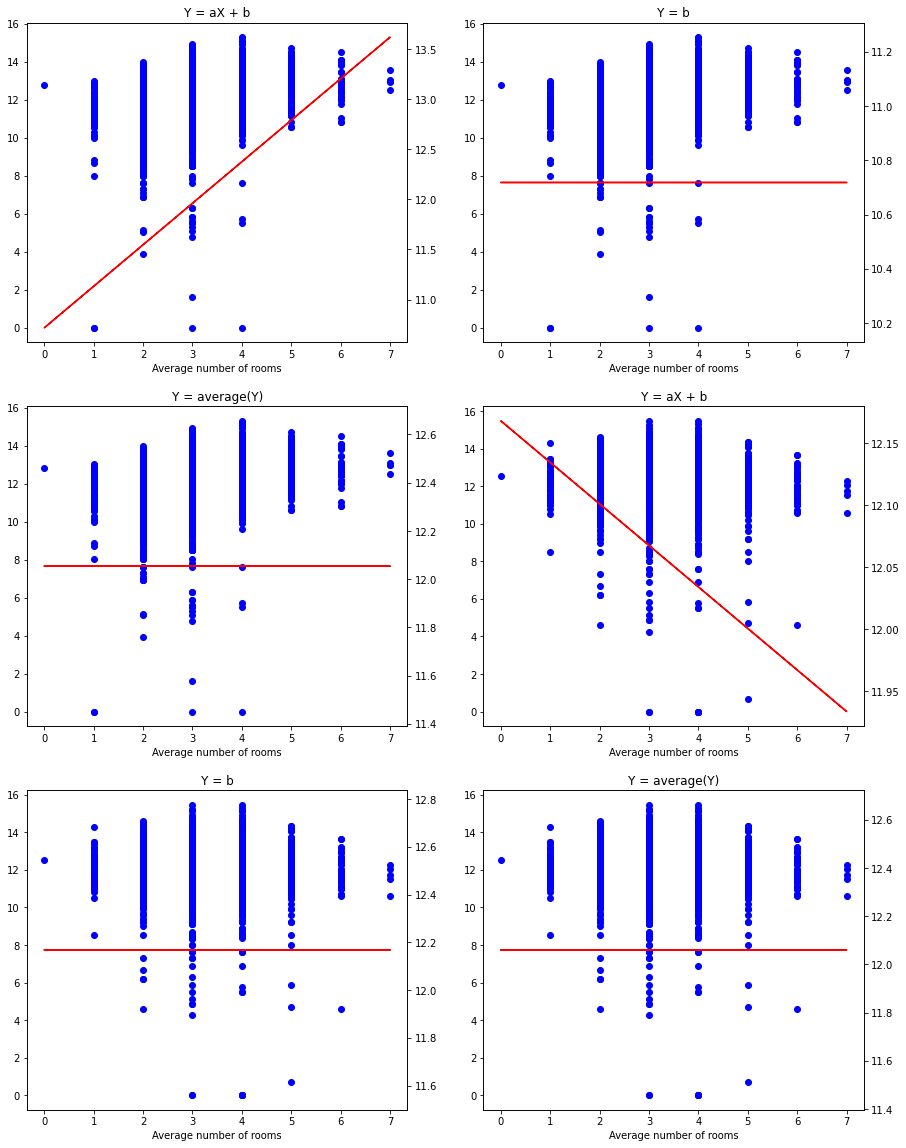

In [19]:
#same comparison for linear models 

flexibility = [0,1,2] 
#1 is linear regression in the form of Y = a X + b 
#2 is just the intercept Y = b 
#3 is just the average value Y = average(Y) 
titles = ['Y = aX + b', 'Y = b', 'Y = average(Y)']

X = boston_housing['BEDRMS']
Y = boston_housing['LOGVALUE']

X = np.array(X)
Y = np.array(Y)

X_train = X[:round(len(X)/2)].reshape(-1,1)
X_val = X[round((len(X))/2):].reshape(-1,1)
Y_train = Y[:round((len(Y))/2)].reshape(-1,1)
Y_val = Y[round((len(Y))/2)-1:].reshape(-1,1)


reg_preds_t = np.zeros(len(X_train))
reg_preds_v = np.zeros(len(X_train))


def calculate_mse(dsetx, dsety):
    """You should provide x data and y data. Here, I will pass training set (x and y)
    and validation set at different calls of the function. """
    linReg = LinearRegression()
    model = linReg.fit(dsetx, dsety)
    predictions = linReg.predict(dsetx)
    return mean_squared_error(dsety, predictions),predictions
   
fig_size = (15,20)
fig = plt.figure(figsize = fig_size)
gs = fig.add_gridspec(3, 2)

def draw_graph(tl, x, y, predictions, f, px, py):
    ax = f.add_subplot(gs[px,py])
    ax.scatter(x,y, color = 'blue')
    ax2 = ax.twinx()
    ax2.plot(x, predictions, color = 'red')
    ax.set(title = tl , xlabel = 'Average number of rooms')
    return f
      
for i in range(3):
    if i == 0: 
        mse_t = calculate_mse(X_train, Y_train)[0]
        mse_v = calculate_mse(X_train, Y_val)[0]
    elif i == 1: 
     #straight line 
        linReg = LinearRegression()
        model_t = linReg.fit(X_train, Y_train)
        predsi_t = model_t.intercept_    
        model_v = linReg.fit(X_train, Y_val)
        predsi_v = model_v.intercept_
    else:
     #average 
        preds_t = np.mean(Y_train)
        preds_v = np.mean(Y_val)
        
reg_preds_t = calculate_mse(X_train, Y_train)[1]
reg_preds_v = calculate_mse(X_train, Y_val)[1]
p_i_t = np.repeat(predsi_t, len(X_train))
p_t = np.repeat(preds_t, len(X_train))
p_i_v = np.repeat(predsi_v, len(X_train))
p_v = np.repeat(preds_v, len(X_train))


draw_graph(titles[0],X_train, Y_train, reg_preds_t, fig, 0,0) #Y = aX + b
draw_graph(titles[1],X_train, Y_train, p_i_t,fig, 0,1) #Y = b
draw_graph(titles[2],X_train, Y_train, p_t,fig, 1,0) #Y = Y^

draw_graph(titles[0],X_train, Y_val , reg_preds_v,fig, 1,1) #Y = aX + b
draw_graph(titles[1],X_train, Y_val , p_i_v,fig, 2,0) #Y = b
draw_graph(titles[2],X_train, Y_val , p_v,fig, 2,1) #Y = Y^

plt.show()

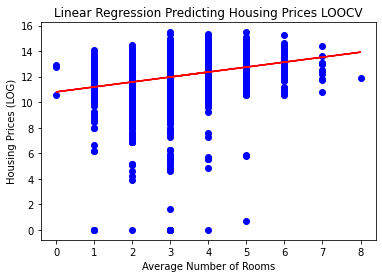

MSE for Linear Model using LOOCV is:  78.41820477294527
R-squared for Linear Model using LOOCV is:  0.006107632890822945


In [36]:
#leave one out 
# from sklearn.model_selection import LeaveOneOut

# loo = LeaveOneOut()
# splits = loo.get_n_splits(Bedroom)

# for train_index, test_index in loo.split(Bedroom):
#     Bed_train[train_index], Bed_test[test_index] = Bedroom[train_index], Bedroom[test_index]
#     Value_train[train_index], Value_test[test_index] = Value[train_index], Value[test_index] 
    
    
Value = boston_housing['LOGVALUE']
Bedroom = boston_housing['BEDRMS']

Bedroom = np.array(Bedroom)
Value = np.array(Value)

Bedroom = Bedroom.reshape(-1,1)
Value = Value.reshape(-1,1)
mean_val = np.mean(Value)

Bed_train = np.zeros(len(Bedroom)-1)
Bed_test = np.zeros(1)
Value_train = np.zeros(len(Bedroom)-1)
Value_test = np.zeros(1)
se_arr = np.zeros(len(Bedroom))
r2_arr = np.zeros(len(Bedroom))
pred_vals = np.zeros(len(Bedroom))
total_err = np.zeros(len(Bedroom))


for i in range(len(Bedroom)):
    Bed_test = Bedroom[i]
    Bed_train = np.delete(Bedroom, i)
    Value_test = Value[i]
    Value_train = np.delete(Value, i)
    
    m_lin = LinearRegression()
    m_lim_model = m_lin.fit(Bed_train.reshape(-1,1), Value_train)
    pred_vals[i] = m_lin.predict(Bed_test.reshape(-1,1)) 
    se_arr[i] = (Bed_test - pred_vals[i])**2
    total_err[i] = (Bed_test - mean_val)**2
    
sum_sq = 0
sum_total = 0
for se in se_arr:
    sum_sq += se 

for te in total_err:
    sum_total += te
    
plt.scatter(Bedroom, Value, color='blue')
plt.plot(Bedroom, pred_vals, color='red')
plt.title("Linear Regression Predicting Housing Prices LOOCV")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Housing Prices (LOG)")
plt.show()

#measurements of the model 
#mean squared error 
mse_loo = np.mean(se_arr)
#r^2
#r^2 formula: 1 - Sum(Res) / Sum(total)
r2_loo = 1 - sum_sq/sum_total 

print("MSE for Linear Model using LOOCV is: ", mse_loo)
print("R-squared for Linear Model using LOOCV is: ", r2_loo)


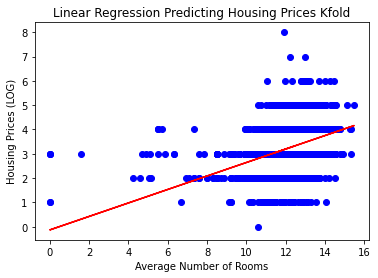

[0.10311313 0.12288962 0.1193079  0.07325207 0.07988481]
Accuracy with 5 fold cross validation:  0.09968950644499308
MSE with Kfold CV is:  0.6806661957583899
R-squared with Kfold CV is:  0.08329760468678138


In [44]:
# k-fold cross validation 
# Bedroom, Value 

kf_x = np.array(boston_housing['LOGVALUE'])
kf_y = np.array(boston_housing['BEDRMS'])

kf_x = kf_x.reshape(-1,1)
kf_y = kf_y.reshape(-1,1)

b_train, b_test, v_train, v_test = train_test_split(kf_x, kf_y, test_size=0.4, random_state=0)

b_train = np.array(b_train)
b_test = np.array(b_test)
v_train = np.array(v_train)
v_test = np.array(v_test)


kfold_lin_mod = m_lin.fit(b_train, v_train)
kfold_pred = m_lin.predict(b_test) 

plt.scatter(b_test, v_test, color='blue')
plt.plot(b_test, kfold_pred , color='red')
plt.title("Linear Regression Predicting Housing Prices Kfold")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Housing Prices (LOG)")
plt.show()

from sklearn.model_selection import cross_val_score

score = cross_val_score(kfold_lin_mod, Bedroom, Value, cv = 5)
print(score)

print("Accuracy with 5 fold cross validation: ", score.mean())

mse_kfold = mean_squared_error(v_test, kfold_pred)
r2_kfold = r2_score(v_test, kfold_pred)
print("MSE with Kfold CV is: ", mse_kfold)
print("R-squared with Kfold CV is: ", r2_kfold)



In [49]:
#with polynomial for LOOCV 


vv = boston_housing['LOGVALUE']
bb = boston_housing['BEDRMS']

bb = np.array(bb)
vv = np.array(vv)

bb = bb.reshape(-1,1)
vv = vv.reshape(-1,1)
mean_val_loo = np.mean(vv)

bt= np.zeros(len(bb)-1)
bte = np.zeros(1)
vt = np.zeros(len(bb)-1)
vte = np.zeros(1)
se_array = np.zeros(len(bb))
r2_array = np.zeros(len(bb))
pred_vals_loo = np.zeros(len(bb))
total_err_loo = np.zeros(len(bb))

#deg 3
se_array3 = np.zeros(len(bb))
r2_array3 = np.zeros(len(bb))
pred_vals_loo3 = np.zeros(len(bb))
total_err_loo3 = np.zeros(len(bb))

#deg 4
se_array4 = np.zeros(len(bb))
r2_array4 = np.zeros(len(bb))
pred_vals_loo4 = np.zeros(len(bb))
total_err_loo4 = np.zeros(len(bb))

for i in range(len(bb)):
    bte = bb[i]
    bt = np.delete(bb, i)
    vte = vv[i]
    vt = np.delete(vv, i)
    
    p2 = PolynomialFeatures(degree = 2, include_bias = False)
    lr = LinearRegression()
    b_p2 = p2.fit_transform(bt.reshape(-1,1))
    lr.fit(b_p2, vt)
    pred_vals_loo[i] = lr.predict(p2.fit_transform(bte.reshape(-1,1)))
    se_array[i] = (bte - pred_vals_loo[i])**2
    total_err_loo[i] = (bte - mean_val_loo)**2
    
    #deg 3 
    p3 = PolynomialFeatures(degree = 3, include_bias = False)
    b_p3 = p3.fit_transform(bt.reshape(-1,1))
    lr.fit(b_p3, vt)
    pred_vals_loo3[i] = lr.predict(p3.fit_transform(bte.reshape(-1,1)))
    se_array3[i] = (bte - pred_vals_loo3[i])**2
    total_err_loo3[i] = (bte - mean_val_loo)**2
    
    #deg 4
    p4 = PolynomialFeatures(degree = 4, include_bias = False)
    b_p4 = p4.fit_transform(bt.reshape(-1,1))
    lr.fit(b_p4, vt)
    pred_vals_loo4[i] = lr.predict(p4.fit_transform(bte.reshape(-1,1)))
    se_array4[i] = (bte - pred_vals_loo4[i])**2
    total_err_loo4[i] = (bte - mean_val_loo)**2
    
s_sq = 0
s_tot = 0
s_sq3 = 0
s_tot3 = 0
s_sq4 = 0
s_tot4 = 0

for s in se_array:
    s_sq += s

for t in total_err_loo:
    s_tot += t

for s3 in se_array3:
    s_sq3 += s3

for t3 in total_err_loo3:
    s_tot3 += t3

for s4 in se_array4:
    s_sq4 += s4

for t4 in total_err_loo4:
    s_tot4 += t4

#measurements of the model 
#mean squared error 
mse_loop2 = np.mean(se_array)
mse_loop3 = np.mean(se_array3)
mse_loop4 = np.mean(se_array4)

m_s_s = [mse_loop2, mse_loop3, mse_loop4]
#r^2
#r^2 formula: 1 - Sum(Res) / Sum(total)
r2_loop2 = 1 - s_sq/s_tot
r2_loop3 = 1 - s_sq3/s_tot3
r2_loop4 = 1 - s_sq4/s_tot4
r2_s = [r2_loop2, r2_loop3, r2_loop4]


for i in range(2,5):
    print("MSE for Polynomial with degree ", i, "is: ", m_s_s[i-2])
    print("R-squared for Polynomial with degree ",i, "is: ", r2_s[i-2])



MSE for Polynomial with degree  2 is:  78.41869767078033
R-squared for Polynomial with degree  2 is:  0.006101385777700141
MSE for Polynomial with degree  3 is:  78.42159619497738
R-squared for Polynomial with degree  3 is:  0.006064649141335532
MSE for Polynomial with degree  4 is:  78.42161858381596
R-squared for Polynomial with degree  4 is:  0.006064365379427006


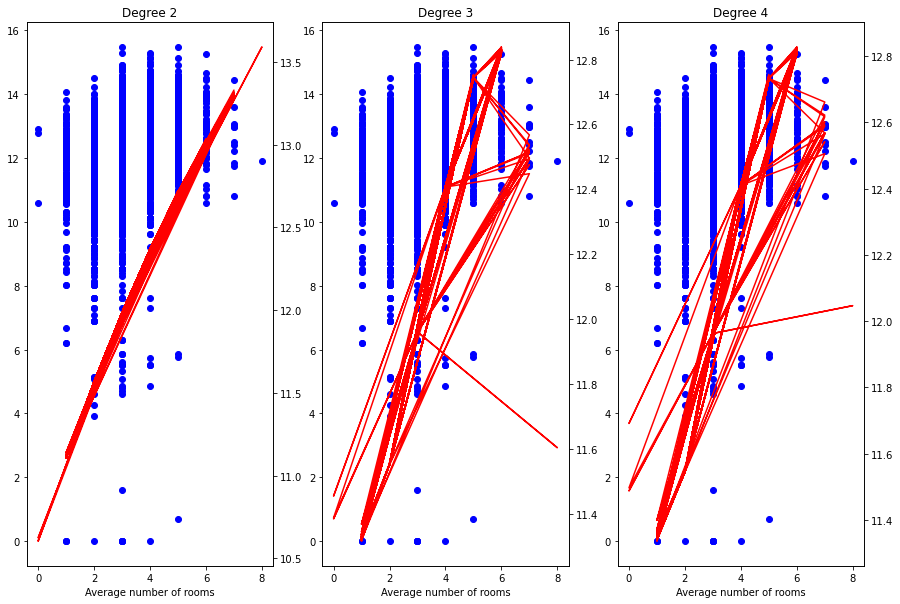

In [54]:
#visualizing Polynomial predictions 

fsize = (15,10)
f = plt.figure(figsize = fsize)
grid = f.add_gridspec(1, 3)

def draw(t, x, y, pred, f, px, py):
    ax = f.add_subplot(grid[px,py])
    ax.scatter(x,y, color = 'blue')
    ax2 = ax.twinx()
    ax2.plot(x, pred, color = 'red')
    ax.set(title = t , xlabel = 'Average number of rooms')
    return f

draw('Degree 2', bb, vv, pred_vals_loo, f, 0, 0)
draw('Degree 3', bb, vv, pred_vals_loo3, f, 0, 1)
draw('Degree 4', bb, vv, pred_vals_loo4, f, 0, 2)

plt.show()

In [58]:
#with polynomial for Kfold CV 

pkf_x = np.array(boston_housing['LOGVALUE'])
pkf_y = np.array(boston_housing['BEDRMS'])

pkf_x = pkf_x.reshape(-1,1)
pkf_y = pkf_y.reshape(-1,1)

pb_train, pb_test, pv_train, pv_test = train_test_split(pkf_x, pkf_y, test_size=0.3, random_state=0)

pb_train = np.array(pb_train)
pb_test = np.array(pb_test)
pv_train = np.array(pv_train)
pv_test = np.array(pv_test)

#degree 2
kfold_p2 = p2.fit_transform(pb_train.reshape(-1,1))
deg2_kf = lr.fit(kfold_p2,pv_train)
kf_p2_pred = lr.predict(p2.fit_transform(pb_test.reshape(-1,1)))
#degree 3
kfold_p3 = p3.fit_transform(pb_train.reshape(-1,1))
deg3_kf = lr.fit(kfold_p3,pv_train)
kf_p3_pred = lr.predict(p3.fit_transform(pb_test.reshape(-1,1)))
#degree 4
kfold_p4 = p4.fit_transform(pb_train.reshape(-1,1))
deg4_kf = lr.fit(kfold_p4,pv_train)
kf_p4_pred = lr.predict(p4.fit_transform(pb_test.reshape(-1,1)))


from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(deg2_kf, pkf_x, pkf_y, cv = 5)
scores3 = cross_val_score(deg3_kf, pkf_x, pkf_y, cv = 5)
scores4 = cross_val_score(deg4_kf, pkf_x, pkf_y, cv = 5)

print("Accuracy with 5 fold cross validation: ")
print("deg 2: ", scores2.mean())
print("deg 3: ", scores3.mean())
print("deg 4: ", scores4.mean())

p2_mse_kf = mean_squared_error(pv_test, kf_p2_pred)
p3_mse_kf = mean_squared_error(pv_test, kf_p3_pred)
p4_mse_kf = mean_squared_error(pv_test, kf_p4_pred)

p2_r2 = r2_score(pv_test, kf_p2_pred)
p3_r2 = r2_score(pv_test, kf_p3_pred)
p4_r2 = r2_score(pv_test, kf_p4_pred)

print("MSE with Kfold CV is: ")
print("deg 2: ", p2_mse_kf)
print("deg 3: ", p3_mse_kf)
print("deg 4: ", p4_mse_kf)
print("---------------------------------------")
print("R-squared with Kfold CV is: ")
print("deg 2: ", p2_r2)
print("deg 3: ", p3_r2)
print("deg 4: ", p4_r2)


Accuracy with 5 fold cross validation: 
deg 2:  0.09781411613784359
deg 3:  0.09781411613784359
deg 4:  0.09781411613784359
MSE with Kfold CV is: 
deg 2:  0.6821148325986018
deg 3:  0.6818264049407332
deg 4:  0.6779937736492481
---------------------------------------
R-squared with Kfold CV is: 
deg 2:  0.09796702162686566
deg 3:  0.09834844018989763
deg 4:  0.10341673610378921


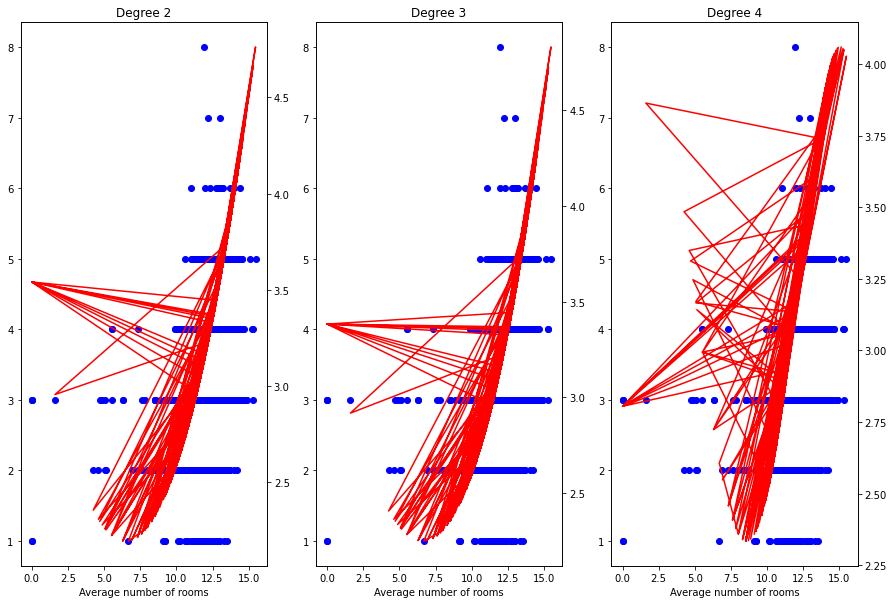

In [63]:
#visualizing polynomial for Kfold CV

fs = (15,10)
fg = plt.figure(figsize = fs)
grd = fg.add_gridspec(1, 3)

def draw(t, x, y, pred, f, px, py):
    ax = f.add_subplot(grd[px,py])
    ax.scatter(x,y, color = 'blue')
    ax2 = ax.twinx()
    ax2.plot(x, pred, color = 'red')
    ax.set(title = t , xlabel = 'Average number of rooms')
    return f

draw('Degree 2', pb_test , pv_test , kf_p2_pred, fg, 0, 0)
draw('Degree 3', pb_test, pv_test , kf_p3_pred, fg, 0, 1)
draw('Degree 4', pb_test , pv_test , kf_p4_pred, fg, 0, 2)

plt.show()

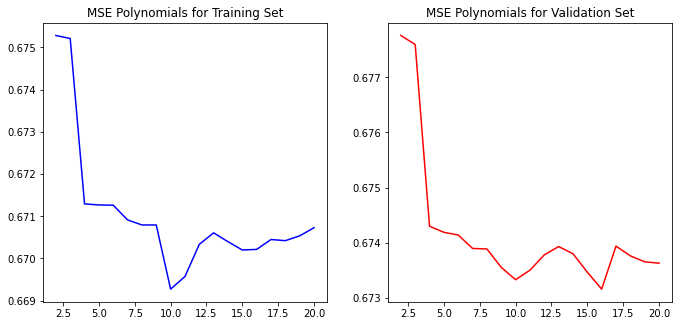

In [64]:
#changes in MSE visualized (only for the polynomials)
# 1B 

import numpy as np
import matplotlib.pyplot as plt 

mse_train = np.zeros(19)
mse_test = np.zeros(19)
fl = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


def calculate_mse2(deg, dsetx, dsety):
    """You should provide degree of polynomial, x data and y data. Here, I will pass 
    training set (x and y) and validation set at different calls of the function. """
    p = PolynomialFeatures(degree = deg, include_bias = False)
    reg = LinearRegression()
    x = p.fit_transform(dsetx.reshape(-1,1))
    reg.fit(x, dsety)
    y_pred = reg.predict(x)
    return mean_squared_error(dsety, y_pred)
    

for i in range(2,21):
    #will try 20 different degrees 
    mse_train[i-2] = calculate_mse2(i, pb_train, pv_train)
    mse_test[i-2] = calculate_mse2(i, pb_test, pv_test)


fig1, ax1 = plt.subplots(1, 2, figsize=(10,5))
fig1.tight_layout(pad=3)
ax1[0].plot(fl, mse_train, color='blue')
ax1[0].title.set_text('MSE Polynomials for Training Set')
ax1[1].plot(fl, mse_test, color='red')
ax1[1].title.set_text('MSE Polynomials for Validation Set')
plt.show()